In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://github.com/Rohanrathod7/my-ds-projects/blob/main/03_statistics_visualization/startup_funding_seaborn/Data/startup_funding.csv"

# The URL is for the HTML page, not the raw CSV data.
# Use the raw data URL instead
raw_url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/03_statistics_visualization/startup_funding_seaborn/Data/startup_funding.csv"

# Read the CSV file
df = pd.read_csv(raw_url)

# Convert the 'Date dd/mm/yyyy' column to datetime objects, specifying the format
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')

# Rename the 'Amount in USD' column to 'AmountinUSD'
df.rename(columns={'Amount in USD': 'AmountinUSD'}, inplace=True)


print("Rows:", len(df), "Columns:", df.shape[1])
print(df.info())

Rows: 3044 Columns: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date dd/mm/yyyy    3036 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   AmountinUSD        2084 non-null   object        
 9   Remarks            419 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 237.9+ KB
None


### Cleaning & Feature Engineering

In [83]:
df['AmountinUSD'] = df['AmountinUSD'].fillna(0)
df['FundingYear'] = df['Date dd/mm/yyyy'].dt.year
df['InvestmentnType'] = df['InvestmentnType'].str.strip().replace({
    'Private Equity':'PrivateEquity', 'Crowd funding':'CrowdFunding'
})
print(df['InvestmentnType'].value_counts())

InvestmentnType
PrivateEquity                  1357
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Private Equity Round              4
Seed                              4
Pre-Series A                      4
Seed / Angle Funding              3
Series E                          2
Corporate Round                   2
Venture Round                     2
Series F                          2
Equity                            2
pre-Series A                      2
Single Venture                    1
pre-series A                      1
Maiden Round                      1
Funding Round                     1
Series G    

### Distribution of Funding Over Years


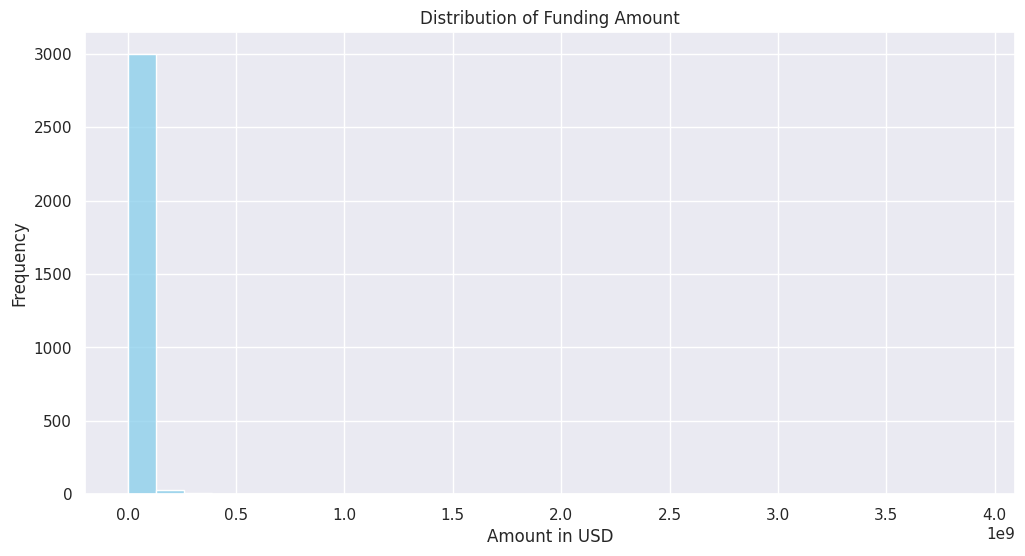

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(df['AmountinUSD'], bins=30, color='skyblue')
plt.title('Distribution of Funding Amount');
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.show()

In [82]:
# Clean and convert 'Amount in USD' column to numeric
df['AmountinUSD'] = df['AmountinUSD'].fillna(0).astype(str).str.replace(',', '', regex=False).replace(['undisclosed', 'unknown', 'Undisclosed'], pd.NA).str.replace('+', '', regex=False).str.replace('\xa0', '', regex=False)
df['AmountinUSD'] = pd.to_numeric(df['AmountinUSD'], errors='coerce')

# Display the first few rows and data types to verify the conversion
display(df.head())
print(df.info())

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,AmountinUSD,Remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.000000,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.000000,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.000000,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.000000,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.000000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3044 non-null   int64         
 1   Date dd/mm/yyyy    3036 non-null   datetime64[ns]
 2   Startup Name       3044 non-null   object        
 3   Industry Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City  Location     2864 non-null   object        
 6   Investors Name     3020 non-null   object        
 7   InvestmentnType    3040 non-null   object        
 8   AmountinUSD        3026 non-null   float64       
 9   Remarks            419 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 237.9+ KB
None


### Funding Breakdown by Investment Type

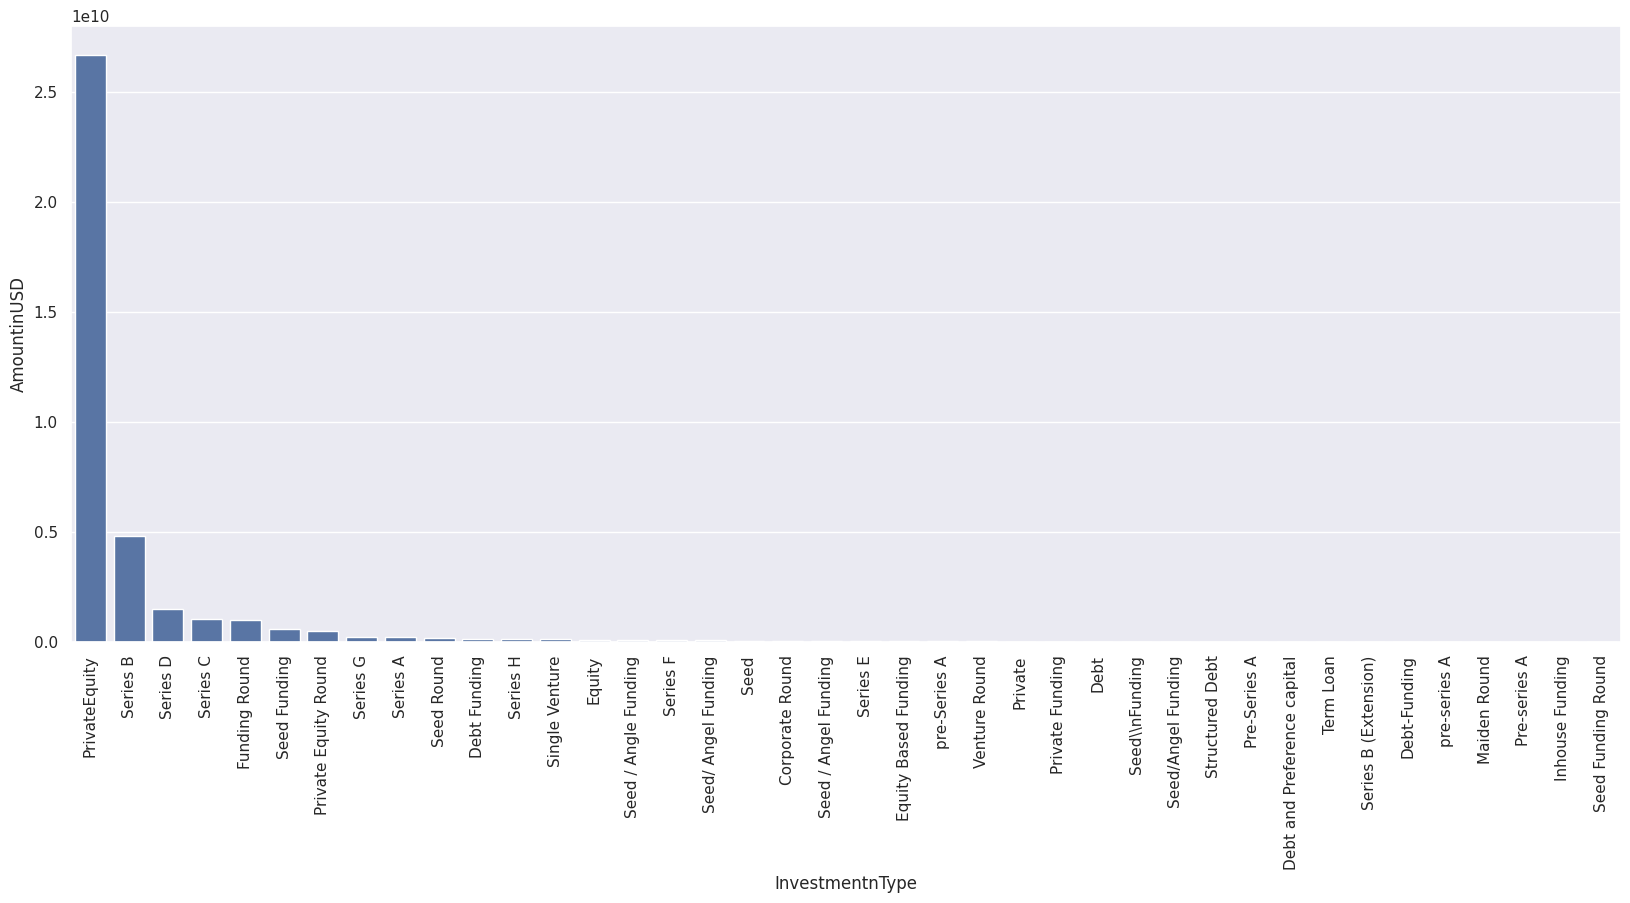

In [111]:
sns.set(style='darkgrid')
pd.set_option('display.float_format', lambda x: '{:f}'.format(x))

temp = df.groupby(['InvestmentnType']).agg({'AmountinUSD':'sum'}).reset_index()\
  .sort_values('AmountinUSD', ascending=False).reset_index(drop=True).iloc[:40, ]

plt.subplots(figsize=(20,8))
sns.barplot(x=temp.InvestmentnType, y=temp.AmountinUSD)
plt.xticks(rotation=90);

### Top Industry Verticals by Funding

/tmp/ipython-input-3224237039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_verticals.values, y=top_verticals.index, palette='viridis')


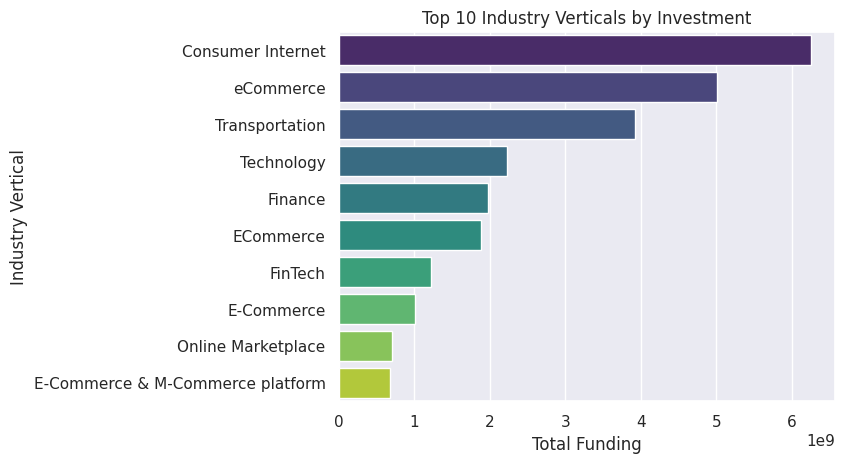

In [112]:
top_verticals = df.groupby('Industry Vertical')['AmountinUSD'].sum().nlargest(10)
sns.barplot(x=top_verticals.values, y=top_verticals.index, palette='viridis')
plt.xlabel("Total Funding")
plt.title("Top 10 Industry Verticals by Investment")
plt.show()

### City-Wise Funding Heatmap

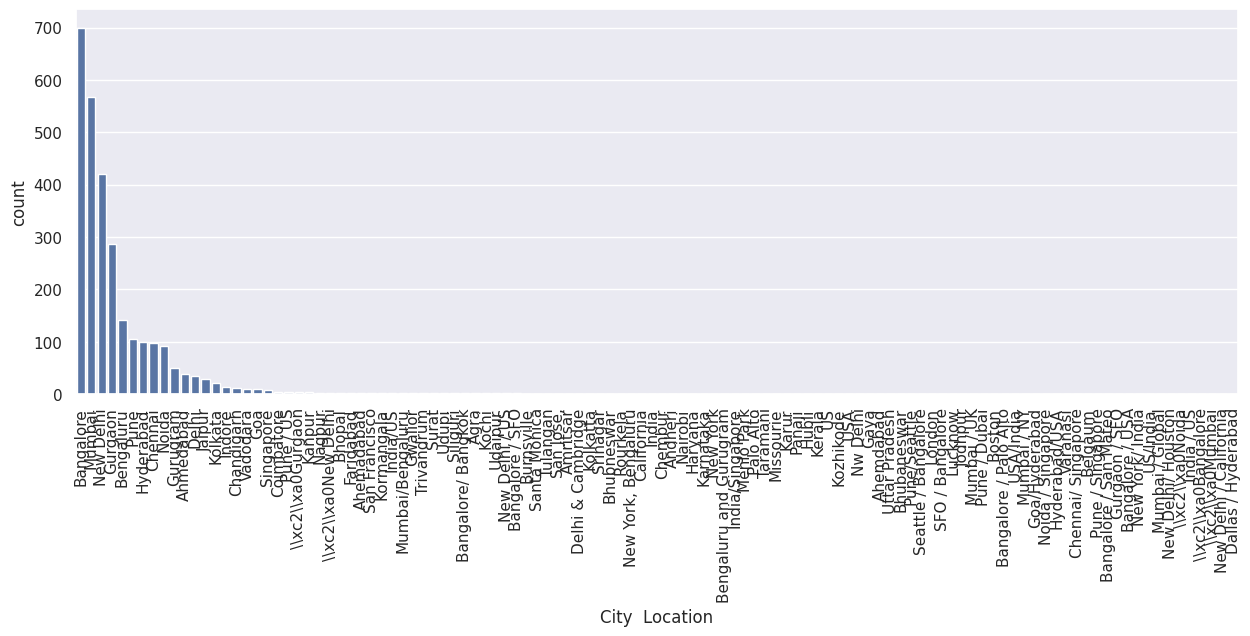

In [113]:

plt.subplots(figsize=(15,5))
p1 = sns.countplot(x = 'City  Location',
              data = df,
              order = df['City  Location'].value_counts().index)

plt.xticks(rotation=90);

### Investor Network Insights

/tmp/ipython-input-2289861503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=investor_counts.values, y=investor_counts.index, palette='cubehelix')


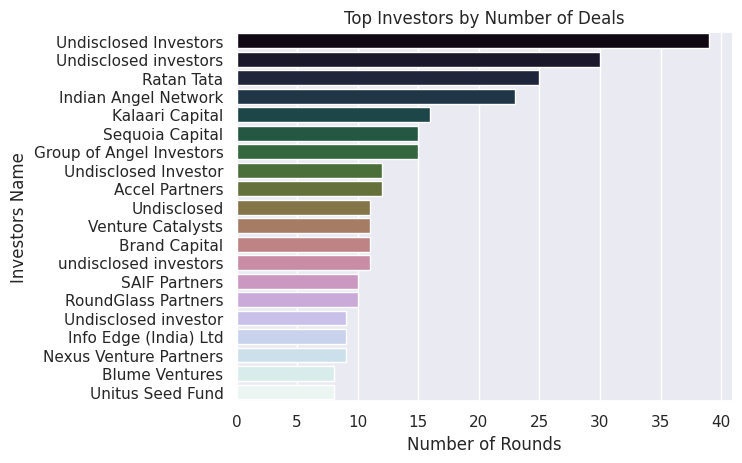

In [103]:
investor_counts = df['Investors Name'].value_counts().nlargest(20)
sns.barplot(x=investor_counts.values, y=investor_counts.index, palette='cubehelix')
plt.title("Top Investors by Number of Deals")
plt.xlabel("Number of Rounds")
plt.show()